In [1]:
# importing libarries
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df=pd.read_csv("../input/banglorehousepricedataset/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#data description
print(df.shape)
print(df.describe())
print(df.info())

(13320, 9)
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         

Just by looking at the describe we can see our price is highly skewed,where the mean is 112 and  the 50% is on 72

In [4]:
#def find_number(text):
    #num = re.findall(r'[0-9]+',text)
    #return " ".join(num)
#df['no of rooms']=df['size'].apply(lambda x: find_number(x))

<a id='2'></a> <h1 style="background-color:grey; color:blue" ><br>Exploratery data analysis<br></h1>
<a id='3'></a>

<b>
*  Steps for EDA:
  
   1. Checking the missing value
   2. checking the description,datatypes
   3. Doing Univariate analysis on the variables to understand how the variables are affecting the outcome
   4. Finding  the correlation between the variables
    </b></center>
   

In [5]:

# checking the datatypes of all the  features in the dataset
print(df.select_dtypes('object').shape)
print('********')
print(df.select_dtypes('int64').shape)
print('********')
print(df.select_dtypes('float').shape)
print('********')
print(df.select_dtypes('bool').shape)

(13320, 6)
********
(13320, 0)
********
(13320, 3)
********
(13320, 0)


In [6]:
#checking the missing value
def miss_val(df):
   miss_col=df[[col for col in df.columns if df[col].isnull().any() == True]].isna().sum()
   return miss_col

print(miss_val(df))

location       1
size          16
society     5502
bath          73
balcony      609
dtype: int64


1>We can see here we have almost 50% of recordis in scocitey columns which are missing.we may get rid of this column .

2>The bedroom in size has to be replaced by BHK ,but before doing that we need to check if there are other names used for BHK.We need to extract only the numbers from this column.

3> we need to do hot encoding for the location column.

4> Area_type needs to  be coded in numbers.

5> we have 73 bath as null,which is not possible we need to impudate with using the size of the hous and average bath in those houses in other records.

6> we will replace the balconey na values with median and drop all the other NA records



In [7]:
#extracting number of rooms and 
#df['size'] = df['size'].str[:2]
#df.head(2)

In [8]:
#df.size=df.size.astype(int)
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#handling balcony missing vaule in bacony using simple imputer
Imp = SimpleImputer(missing_values=np.NaN, strategy='median')
df.balcony=pd.DataFrame(Imp.fit_transform(df['balcony'].values.reshape(-1,1))[:,0])

#values.reshap means that you are not sure about what number of rows or columns you can give and you are asking numpy
#to suggest a number of column or rows to get reshaped in.
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


so using simple imputer will work for us and also there is not much of a deviation in the data  'Balcony' .Again there are multiple ways to do this but here we are using simpleimputer.

In [10]:
#drop column socitey and all the other missing values 

df=df.drop(columns=['society'])
df=df.dropna()

### Understanding the data

In [11]:
#encoding the cateogrical variables


df['availability']=np.where(df['availability']=='Ready To Move',1,0)

In [12]:
# handling range values in total_sqft
# we will first extract all those records which has "-" in it and then extract them and then  find the average of those numbers.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,0,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,0,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,0,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,0,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,1,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,1,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,0,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
648,Built-up Area,1,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000
661,Super built-up Area,1,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,0,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000


we can see we have total _sqft in  sq. meter and perch,for now we will park those values aside and focus on the range average

In [14]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2: 
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        #return x--> we will use this for future conversion of sqmt and yard and acres
        return None

In [15]:
df1=df.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [16]:
# price per sqft
df2=df1.copy()
df2['ppsqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,ppsqft
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [17]:
#handling location column

en_label = preprocessing.LabelEncoder()

#for i in df.select_dtypes('object'):
#df['location']= en_label.fit_transform(df['location'])
# curse of dimensionality so if we are doing one hot encoding or label enoding it won't be good ,we will group the values here
df3=df2.copy()
df3['location']=df3['location'].apply(lambda x: x.strip())
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats_lessthan10=(location_stats[location_stats<=10])#grouping the location which has less than 10 hits
location_stats_lessthan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [18]:
len(df3.location.unique())

1293

In [19]:
#putting any tging with less than 10 location count as others
df3.location=df3.location.apply(lambda x: 'other' if x in  location_stats_lessthan10 else x)#this will leave us with only 242 location

In [20]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
##extracting number of rooms and 
df4=df3.copy()
def extract_num(x):
    tokens=x.split(' ')
    if len(tokens) == 2: 
        return(float(tokens[0]))
    try:
        return float(x)
    except:
        #return x--> we will use this for future conversion of sqmt and yard and acres
        return None
    
df4.size=df4['size'].apply(extract_num)

### Outlier detection 

In [22]:
df3.shape

(13246, 9)

In [23]:
#getting the area per room
df4['area_per_room']=df4['total_sqft']/df4['size']
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,ppsqft,area_per_room
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0


#### outlier removal process 1:
##### remove records having area per room less than 300

In [24]:

df5=df4[~(df4.area_per_room<300)]
df5.shape

(12502, 10)

#### outlier removal process 2:
##### we need to check and remove all the data pointers which are beyond 1st standerd deviation for all the location
##### which means we need to find describe based on location

In [25]:
df5.ppsqft.describe()#we can see there are extrems end in the data.

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: ppsqft, dtype: float64

In [26]:
#removes the records which are beyond 1 std  from the mean based on the location
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.ppsqft)
        std=np.std(subdf.ppsqft)
        reduced_df=subdf[(subdf.ppsqft>=(m-std)) & (subdf.ppsqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return  df_out
df6=remove_pps_outliers(df5)
df6.shape

(10241, 10)

In [27]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,ppsqft,area_per_room
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0


In [28]:
df5.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12502, dtype: float64

In [29]:
df5.describe()

,availability,size,total_sqft,bath,balcony,price,ppsqft,area_per_room
count,12502.000000,12502.000000,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000,12456.000000
mean,0.788034,2.650696,1590.189927,2.564790,1.601024,111.311915,6308.502826,596.635185
std,0.408717,0.981698,1260.404795,1.084946,0.798562,152.089966,4168.127339,387.540157
min,0.000000,1.000000,300.000000,1.000000,0.000000,9.000000,267.829813,300.000000
25%,1.000000,2.000000,1115.000000,2.000000,1.000000,49.000000,4210.526316,491.916667
50%,1.000000,3.000000,1300.000000,2.000000,2.000000,70.000000,5294.117647,562.500000
75%,1.000000,3.000000,1700.000000,3.000000,2.000000,115.000000,6916.666667,630.000000
max,1.000000,16.000000,52272.000000,16.000000,3.000000,3600.000000,176470.588235,26136.000000


#### outlier removal 3:

##### If the location and sqft is same  then the price of  2BHK should not be more than 3 BHK

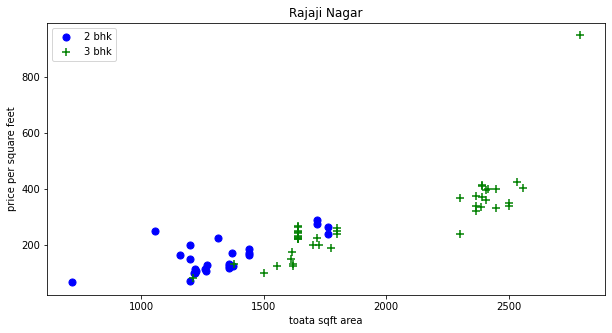

In [30]:
# visualizing the condition 1st:

def viz_bhk(df,location):
    
    plt.figure(figsize=(10,5))
    #fig, ax = plt.subplots()
    #matplotlib.rcParams['figure.figsize']=(20,10)
    bhk2=df[(df['location']==location) &( df['size']==2)]
    bhk3=df[(df['location']==location) &( df['size']==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 bhk',marker="+",s=50)
    #plt.xticks(np.arange(min(bhk3.total_sqft), max(bhk3.total_sqft)+1, 1.0))
    plt.xlabel("toata sqft area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()
   
    
viz_bhk(df5,"Rajaji Nagar")

In [31]:
# removing the data points where price of 2 bhk is more than 3 BHK in the same area

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for size, bhk_df in location_df.groupby('size'):
            bhk_stats[size] = {
                'mean': np.mean(bhk_df.ppsqft),
                'std': np.std(bhk_df.ppsqft),
                'count': bhk_df.shape[0]
            }
        for size, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(size-1)# gets the information for size-1 from above disctionary
            if stats and stats['count']>5:#only where the count of the size per location is grtr than 5
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 10)

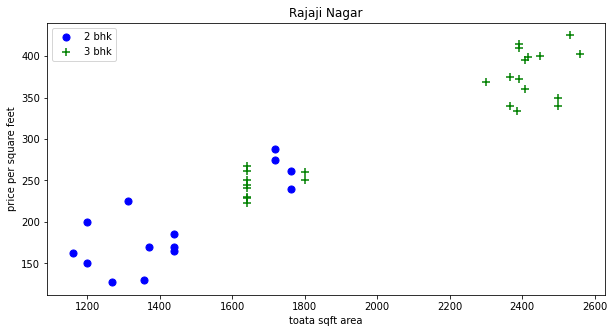

In [33]:
viz_bhk(df7,"Rajaji Nagar")

#### Outlier removal process 4: 

will check the number of bathrooms

In [34]:
df7.shape

(7329, 10)

In [35]:
df8=df7[~(df7['bath']>df7['size']+2)]

In [36]:
df8.shape

(7325, 10)

### Understanding the data:

##### checking the distribution

[Text(0.5, 0, 'PPsqft'), Text(0, 0.5, 'count')]

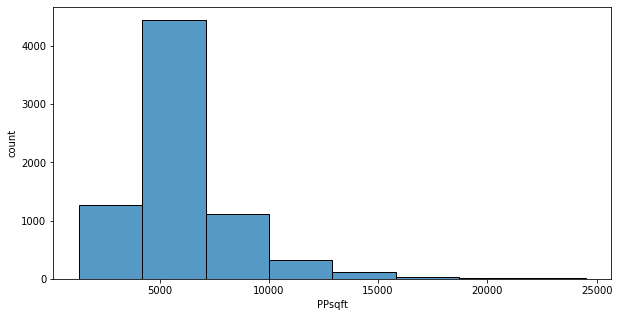

In [37]:
#Checking the distribution of the price
plt.figure(figsize=(10,5))
ax=sns.histplot(df7.ppsqft,bins=8)
#plt.hist(df7.ppsqft,rwidth=.8)
ax.set(xlabel="PPsqft", ylabel = "count")

<AxesSubplot:xlabel='size', ylabel='count'>

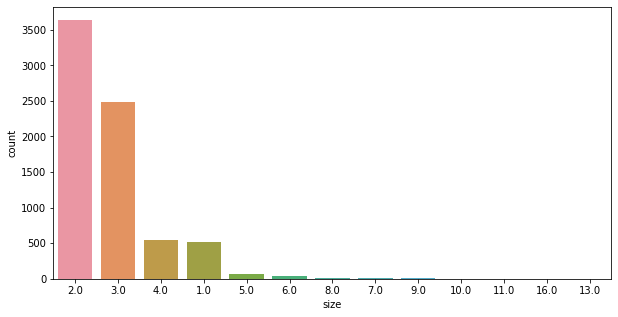

In [38]:
#distribution of size 
plt.figure(figsize=(10,5))
sns.countplot(x=df7['size'].astype(str),order=df7['size'].astype(str).value_counts().index)

<AxesSubplot:xlabel='area_type', ylabel='count'>

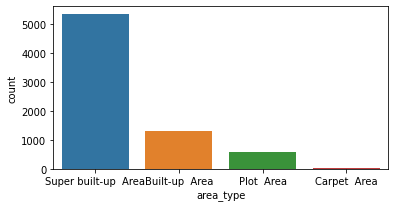

In [39]:
plt.figure(figsize=(6,3))
#sns.barplot(x=df.area_type,y=df.price)
sns.countplot(x=df7['area_type'].astype(str),order=df7['area_type'].astype(str).value_counts().index)

#### dropping unneccery columns:


In [40]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,ppsqft,area_per_room
0,Super built-up Area,0,1st Block Jayanagar,4.0,2850.0,4.0,1.0,428.0,15017.543860,712.500000
1,Super built-up Area,0,1st Block Jayanagar,3.0,1630.0,3.0,2.0,194.0,11901.840491,543.333333
2,Super built-up Area,1,1st Block Jayanagar,3.0,1875.0,2.0,3.0,235.0,12533.333333,625.000000
3,Built-up Area,0,1st Block Jayanagar,3.0,1200.0,2.0,0.0,130.0,10833.333333,400.000000
4,Super built-up Area,0,1st Block Jayanagar,2.0,1235.0,2.0,2.0,148.0,11983.805668,617.500000


In [41]:
df9=df8.join(pd.get_dummies(df8['location'], prefix='', prefix_sep=''))

In [42]:
df9.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,ppsqft,area_per_room,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,0,1st Block Jayanagar,4.0,2850.0,4.0,1.0,428.0,15017.543860,712.500000,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1st Block Jayanagar,3.0,1630.0,3.0,2.0,194.0,11901.840491,543.333333,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1st Block Jayanagar,3.0,1875.0,2.0,3.0,235.0,12533.333333,625.000000,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,0,1st Block Jayanagar,3.0,1200.0,2.0,0.0,130.0,10833.333333,400.000000,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,0,1st Block Jayanagar,2.0,1235.0,2.0,2.0,148.0,11983.805668,617.500000,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df9.drop(columns=['balcony','ppsqft','area_per_room','other','area_type','location','availability'],inplace=True)

In [44]:
df9.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### model building

In [45]:
#Split the datset in X and y
x=df9.drop(columns=['price'],axis='columns')
y=(df9.price)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [47]:
x.head()

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression(n_jobs=1000)
model1.fit(x_train,y_train)
print('LR train model:' + str( model1.score(x_train,y_train)))
print('LR test model:' + str(model1.score(x_test,y_test)))

LR train model:0.8636110937467334
LR test model:0.8182200773037218


In [49]:
#K-fold

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=.25,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8507328 , 0.84291693, 0.82053465, 0.83657512, 0.83904732])

In [50]:
#Trying diffrent algorithm:Hyperparameters-gridsearchmethod
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge


def find_best_model(x,y):
    algos={
        
        'linear_regression' :{
        
        'model':LinearRegression(),
        'params':{
            'normalize':[True,False]
            
        }
    },

          'lasso' :{
        
        'model':Lasso(),
        'params':{
            'selection':['random','cyclic'],
            'alpha' :[1,2,.1,.001]            
        }
    },

          'Elastic' :{
        
        'model':ElasticNet(),
        'params':{
            #'selection':['random','cyclic'],
            'l1_ratio':[1,.001],
            'alpha' : [.1,.001,1,.01]       
        }
    },
     
          'deciscion_tree' :{
        
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
            
        }
    }
          
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=.25,random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.837961,{'normalize': False}
1,lasso,0.837978,"{'alpha': 0.001, 'selection': 'cyclic'}"
2,Elastic,0.837978,"{'alpha': 0.001, 'l1_ratio': 1}"
3,deciscion_tree,0.759271,"{'criterion': 'mse', 'splitter': 'random'}"


In [51]:
#np.where(x.columns=='1st Block Jayanagar')[0][0]

In [52]:
df9.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
x.shape

(7325, 244)

In [54]:
x_train.head()

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5236,2.0,980.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5605,2.0,1140.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,2.0,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9124,2.0,1230.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8340,2.0,1370.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
def predict_price(size,total_sqft,bath,location):    
    loc_index = np.where(x.columns==location)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = size
    a[1] = total_sqft
    a[2] = bath
    if loc_index >= 0:
        a[loc_index] = 1

    return model1.predict([a])[0]

In [56]:
#np.where(x.columns=='1st Phase JP Nagar')[0][0]

In [57]:
predict_price(2, 1000, 2,'1st Phase JP Nagar')

82.86729446836102

#### Export the tested model to a pickle file

In [58]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)

#### Export location and column information to a file that will be useful later on in our prediction application

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f: 
    f.write(json.dumps(columns))